In [1]:
import numpy as np
import cv2
import math

In [2]:
def meanStdDev( img ):
    mean = [0,0,0]
    mean2 = [0,0,0]
    stddev = [0,0,0]

    for i in range( img.shape[0] ):
        for j in range( img.shape[1] ):
            for k in range( 3 ):
                mean[k] = mean[k] + img[i][j][k]
                mean2[k] = mean2[k] + img[i][j][k] * img[i][j][k]
    for k in range( 3 ):
        mean[k] = mean[k] / (img.shape[0] * img.shape[1])
        mean2[k] = mean2[k] / (img.shape[0] * img.shape[1])
        stddev[k] = math.sqrt( mean2[k] - mean[k] * mean[k] )

    return mean, stddev

In [3]:
def test():
    A = cv2.imread( "A.jpg" ).astype( float )
    B = cv2.imread( "B.jpg" ).astype( float )
    cv2.imshow( "A", A.astype( np.uint8 ) )
    cv2.imshow( "B", B.astype( np.uint8 ) )
    meanA, stddevA = meanStdDev( A )
    print( meanA, stddevA )

    #mean = np.mean(A, axis=(0, 1))
    #stddev = np.std(A, axis=(0, 1))
    #print(mean.shape, stddev.shape)
    #print(mean, stddev)

    meanB, stddevB = meanStdDev( B )

    for i in range( A.shape[0] ):
        for j in range( A.shape[1] ):
            for k in range( 3 ):
                A[i][j][k] = (A[i][j][k] - meanA[k]) / stddevA[k] * stddevB[k] + meanB[k]
                if A[i][j][k] > 255:
                    A[i][j][k] = 255
                elif A[i][j][k] < 0:
                    A[i][j][k] = 0

    cv2.imshow( "A new", A.astype( np.uint8 ) )
    cv2.waitKey( 0 )

In [ ]:
test()
meanStdDev(img)

[105.03854636591478, 113.43577694235589, 81.77139097744362] [66.40073936608792, 67.09961554828156, 76.07502912395462]


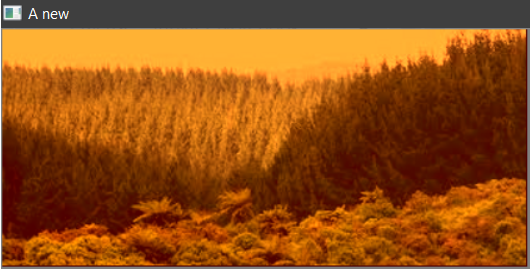